In [1]:
pip install seaborn

## helps to perform well analyze various statistical models.
pip install statsmodels

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [109]:
import seaborn as sns

In [111]:
import matplotlib as plt
%matplotlib inline

In [112]:
## loding data using seaborn

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\AkhilPokuri\AppData\Local\Temp\ipykernel_22368\1029133375.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

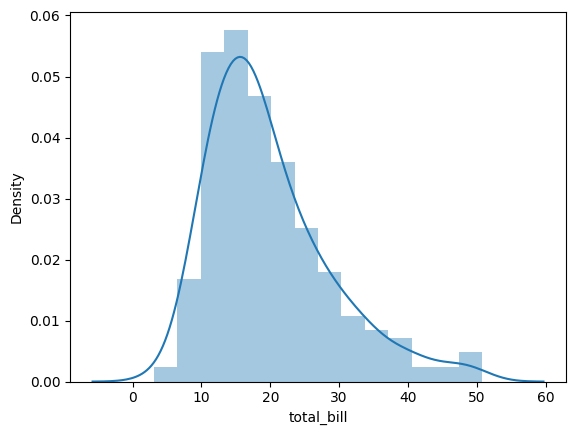

In [113]:
## Distplot-- focus on one column of an data set(univariant set of observations)

sns.distplot(tips['total_bill'])

C:\Users\AkhilPokuri\AppData\Local\Temp\ipykernel_22268\3918347888.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'],kde=False,bins=30,color='r')


<Axes: xlabel='total_bill'>

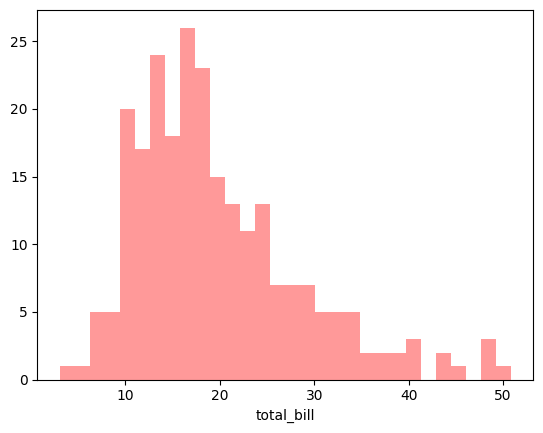

In [12]:
## adding kde=False --to remove the line of (KDE) kernal density estimation 
## bins = 20 
sns.distplot(tips['total_bill'],kde=False,bins=30,color='r')

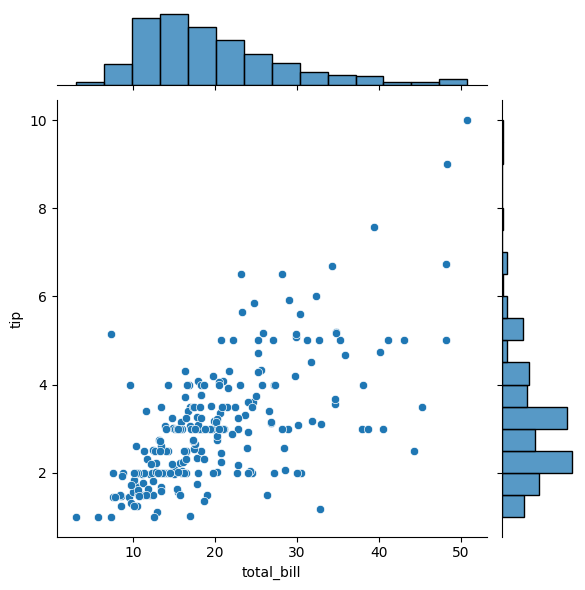

In [16]:
## join plot in seaborn-- combination of two different plots 

sns.jointplot(x='total_bill', y = 'tip', data=tips )

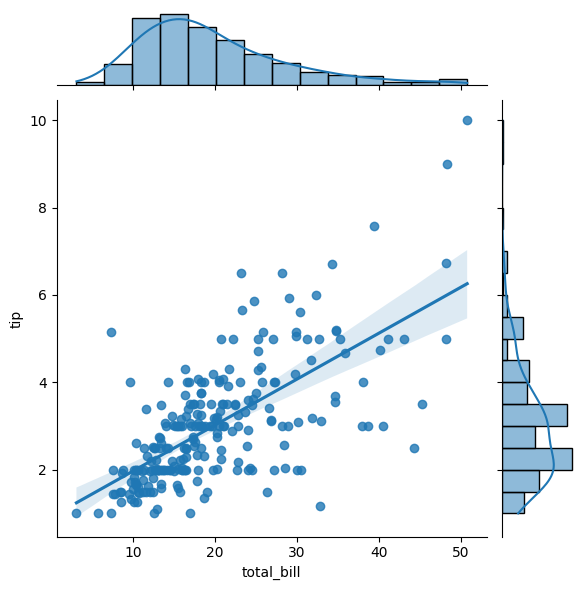

In [26]:
## has one more benfit in Kind allows to display diff ploting types

#sns.jointplot(x='total_bill', y = 'tip', data=tips, kind='kde' )
#sns.jointplot(x='total_bill', y = 'tip', data=tips, kind='hex' )
sns.jointplot(x='total_bill', y = 'tip', data=tips, kind='reg' )


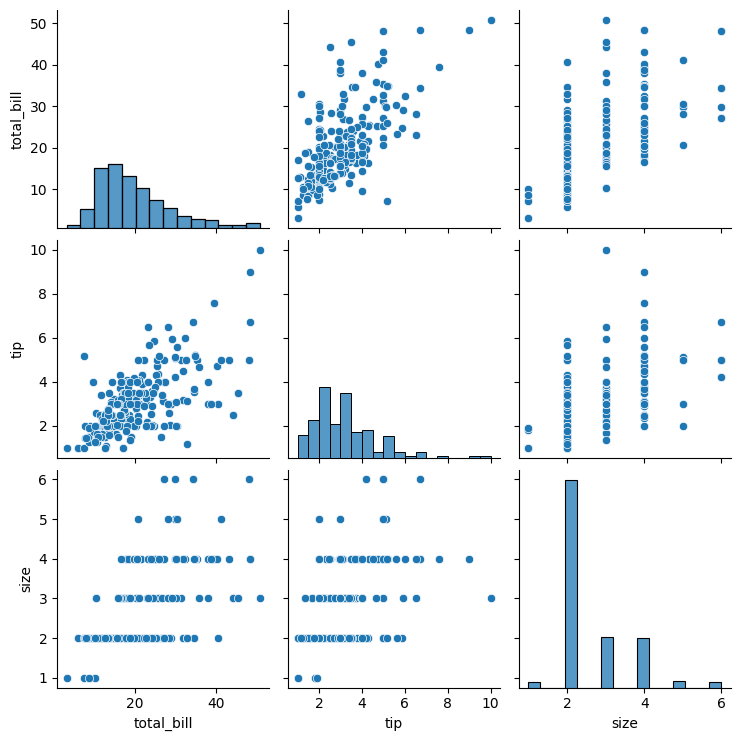

In [27]:
## pair plot -- only for numerical columnsS

sns.pairplot(tips)

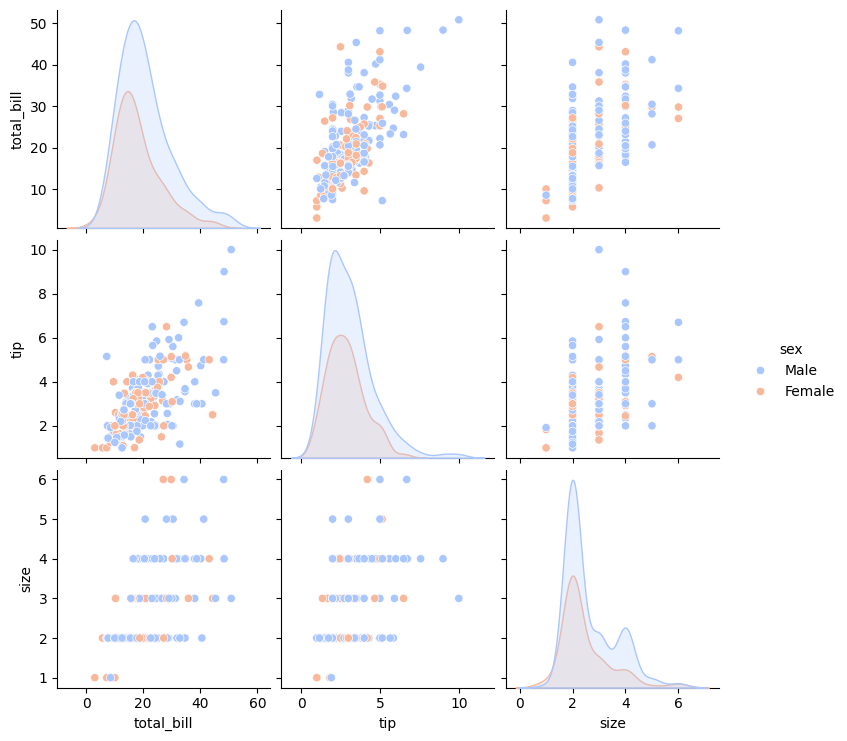

In [32]:
## adding catageries by hue='', palette for coloring it directly displays legend
#sns.pairplot(tips,hue='sex',palette='colorblind') 
sns.pairplot(tips,hue='sex',palette='coolwarm') 

C:\Users\AkhilPokuri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Users\AkhilPokuri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=l

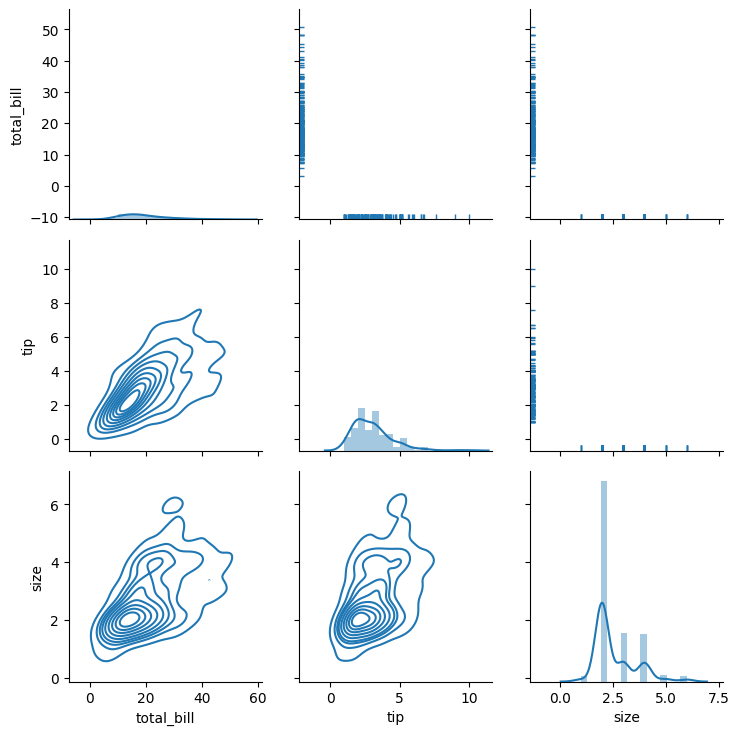

In [121]:
##PAIRGRID

pg=sns.PairGrid(tips)
pg.map_diag(sns.distplot)
pg.map_upper(sns.rugplot)
pg.map_lower(sns.kdeplot)

<Axes: xlabel='total_bill'>

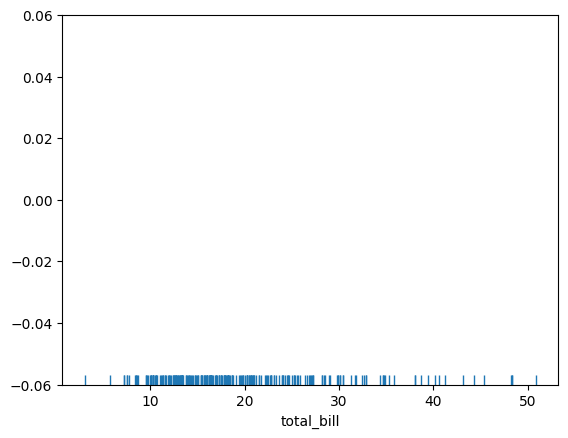

In [35]:
## rugplot 
sns.rugplot(tips['total_bill'])


C:\Users\AkhilPokuri\AppData\Local\Temp\ipykernel_22268\1363558180.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'],kde=False)


<Axes: xlabel='total_bill'>

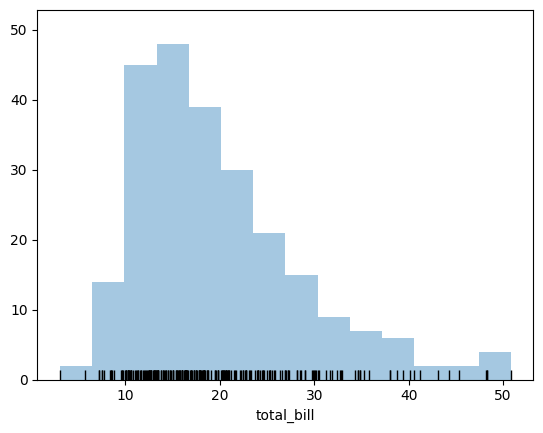

In [50]:
sns.distplot(tips['total_bill'],kde=False)
sns.rugplot(tips['total_bill'],color='black')


In [ ]:
##KDE-PLOT

(0.0, 1.0)

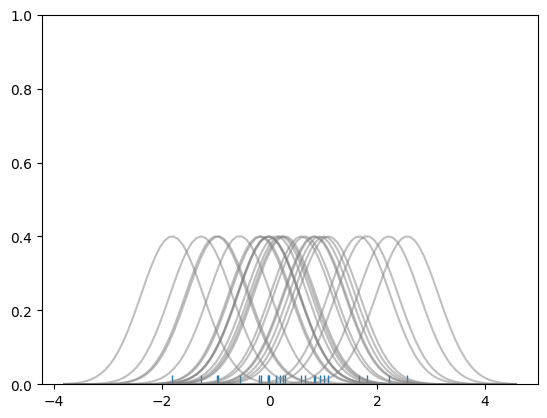

In [51]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

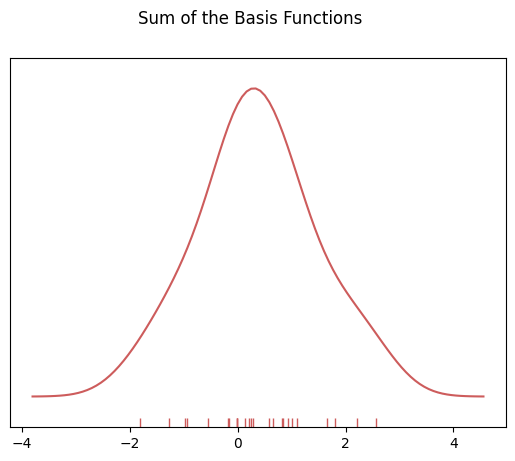

In [52]:

# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='size', ylabel='Density'>

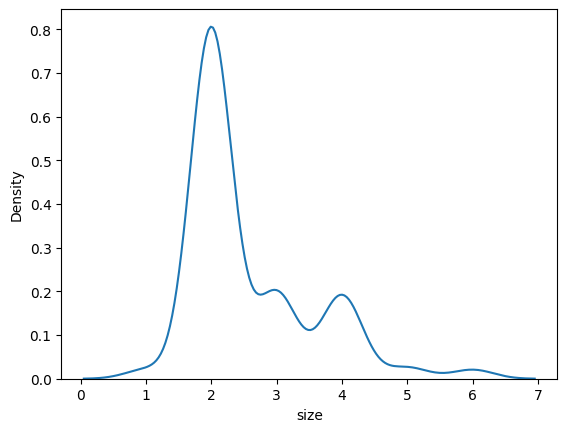

In [57]:
sns.kdeplot(tips['size'])

In [ ]:
################################################ SEABORN CATEGORICAL PLOTS ############################################

In [2]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
import numpy as np 
import pandas as py

<Axes: xlabel='sex', ylabel='total_bill'>

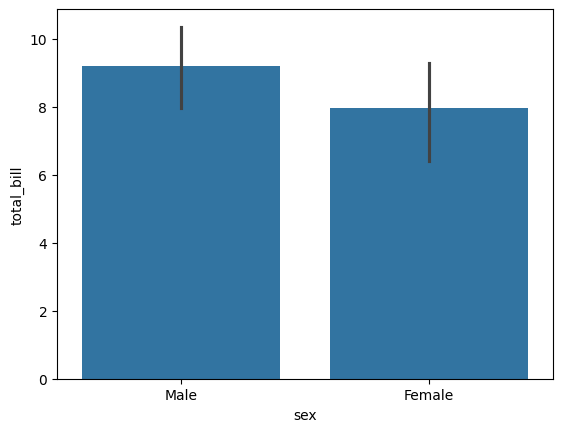

In [14]:
## bar plot ##

sns.barplot(data=tips,x='sex',y='total_bill',estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

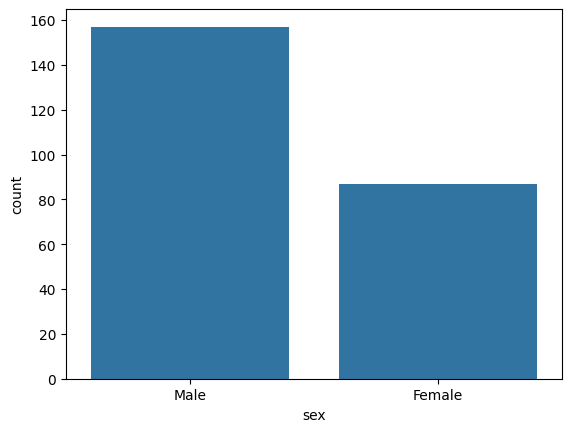

In [19]:
sns.countplot(data=tips,x='sex')

<Axes: xlabel='day', ylabel='total_bill'>

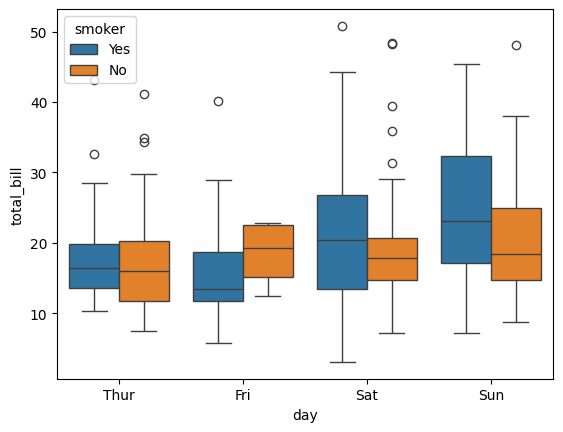

In [41]:
sns.boxplot(data=tips,x='day',y='total_bill',hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

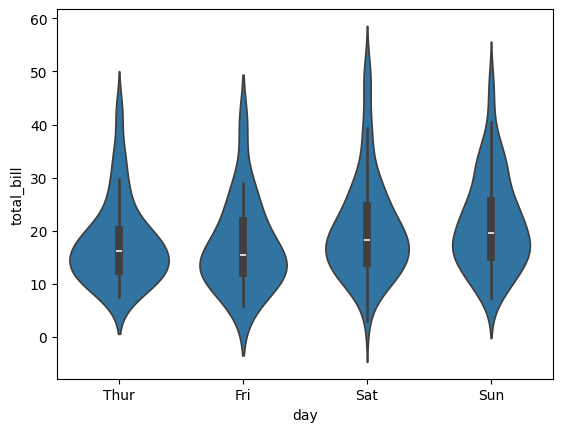

In [44]:
## Violinplot deals samelike box plot
sns.violinplot(data=tips,x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

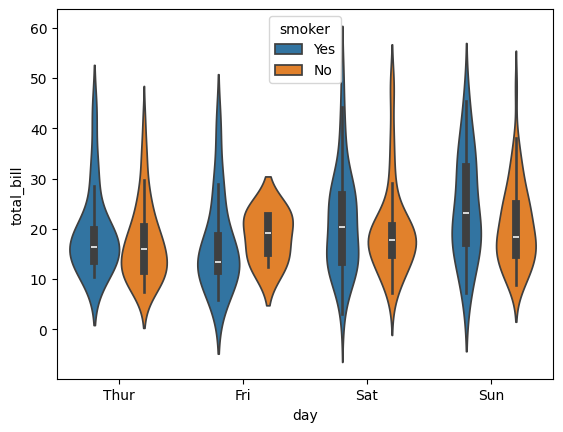

In [47]:
## hue helps lo add legend
sns.violinplot(data=tips,x='day',y='total_bill',hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

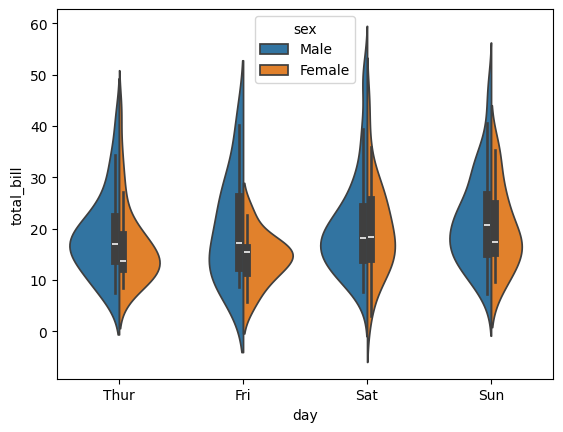

In [51]:
sns.violinplot(data=tips,x='day',y='total_bill',hue='sex',split=True)

<Axes: xlabel='day', ylabel='total_bill'>

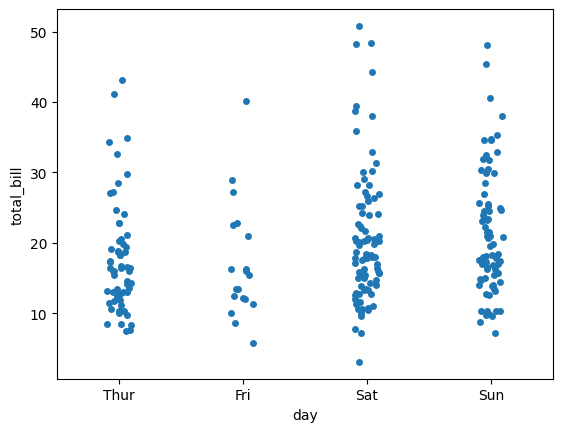

In [54]:
## strip plot

sns.stripplot(x='day',y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

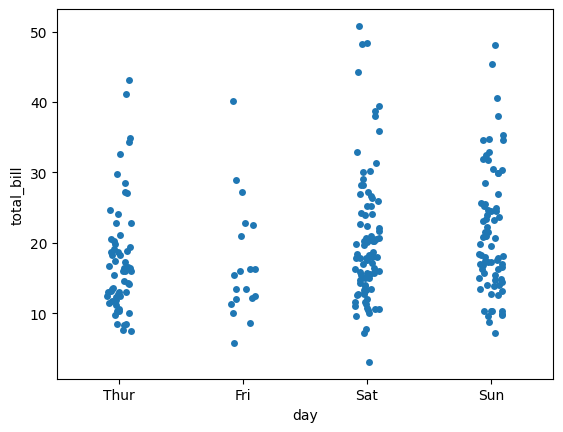

In [55]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

<Axes: xlabel='day', ylabel='total_bill'>

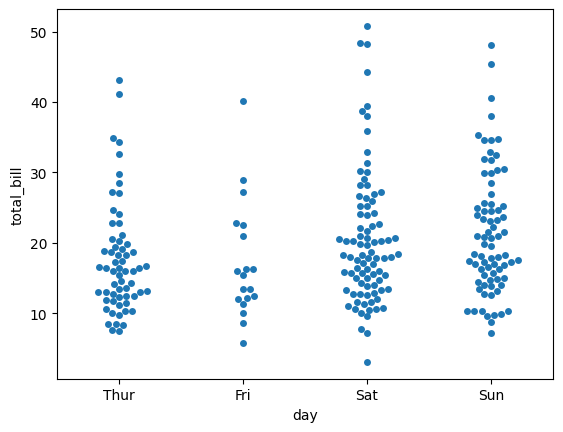

In [57]:
## combination of strip and vilon plot
sns.swarmplot(x='day',y='total_bill',data=tips)

In [ ]:
## factorplot
#not availabel
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

In [ ]:
####################################### matrix plots###########################################

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [14]:
#method-1
# Attempt to convert non-numeric columns to numeric, replacing non-convertible values with NaN
#flights['month'] = pd.to_numeric(flights['month'], errors='coerce')


In [49]:
#method-2
# Select only numeric columns

numeric_flights=flights.select_dtypes(include=[np.number])
## before doing heat plot we need to check the co-relation of dta sets

nf=numeric_flights.corr()
nf

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [50]:
# Select only numeric columns

nt=numeric_tips=tips.select_dtypes(include=[np.number])
nt

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [52]:
## co relation of columns in a file
nt=numeric_tips.corr()
nt

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

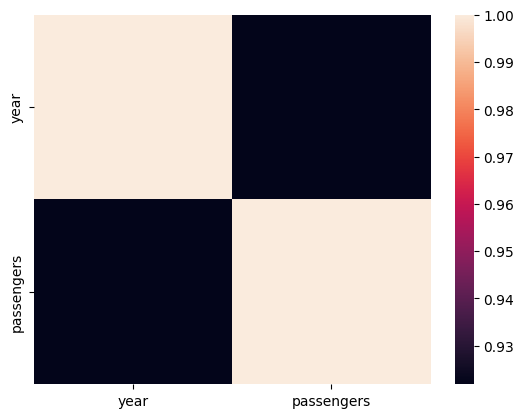

In [53]:
## heatmap Ploting
sns.heatmap(nf)

<Axes: >

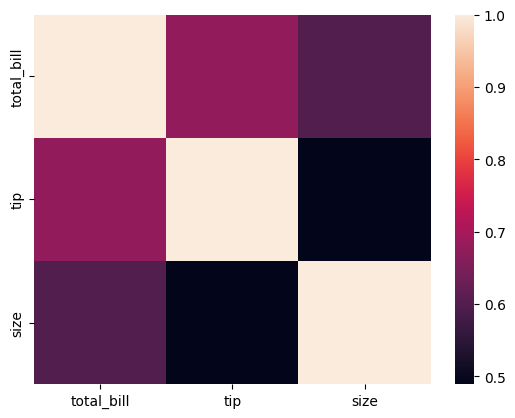

In [54]:
sns.heatmap(nt)

<Axes: >

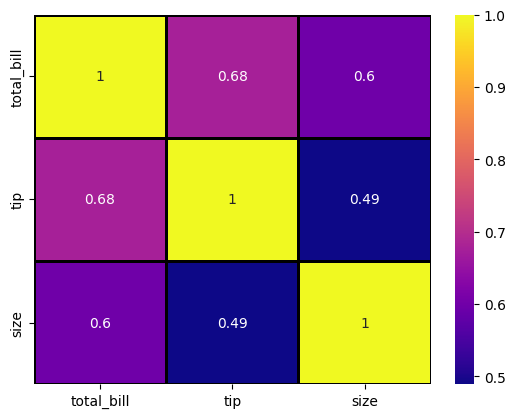

In [69]:
##write the data value in each cell.
sns.heatmap(nt,annot = True,cmap='plasma',linecolor ='black', linewidths = 1)

In [72]:
## pivort table
pf=flights.pivot_table(index='month',columns='year',values='passengers')

In [73]:
pf

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

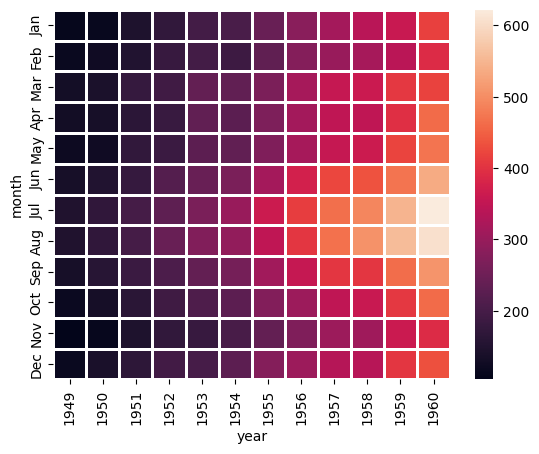

In [108]:
sns.heatmap(data=pf,linecolor='white',linewidth=1.0,annot=False)

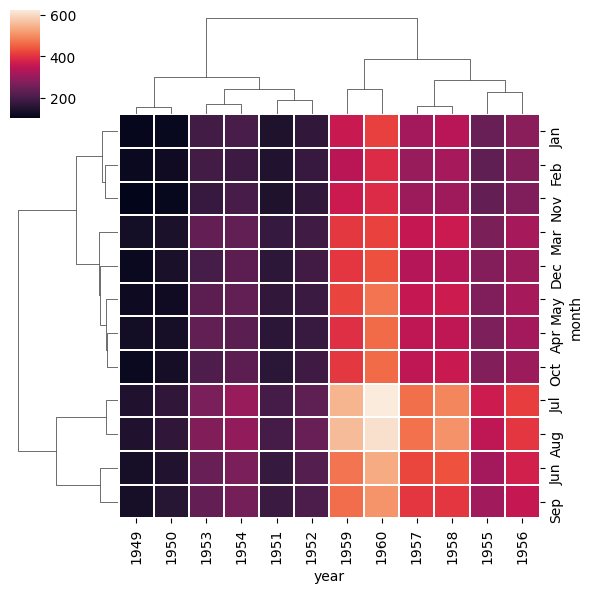

In [107]:
## Clustermap
sns.clustermap(data=pf,linecolor='white',linewidth=0.2,figsize=(6, 6))


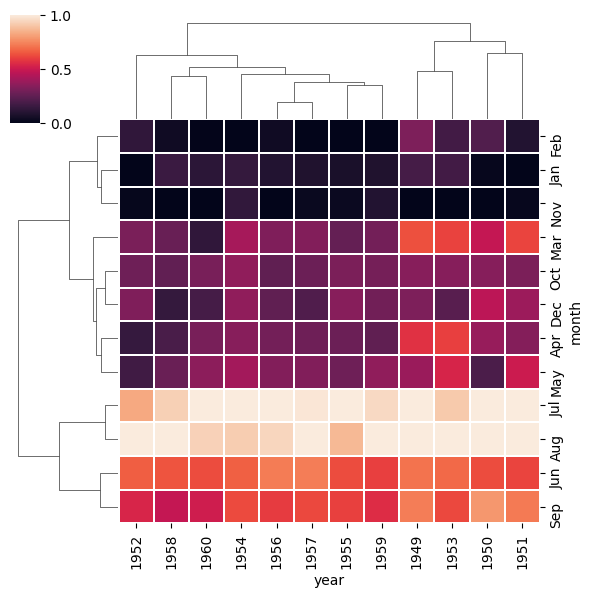

In [106]:
#Clustermap with Standard Scale
sns.clustermap(figsize=(6, 6),linecolor='white',linewidth=0.2,data=pf,standard_scale=1)

In [ ]:
####################################### GRIDS PLOT ######################################

In [123]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\AkhilPokuri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\AkhilPokuri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\AkhilPoku

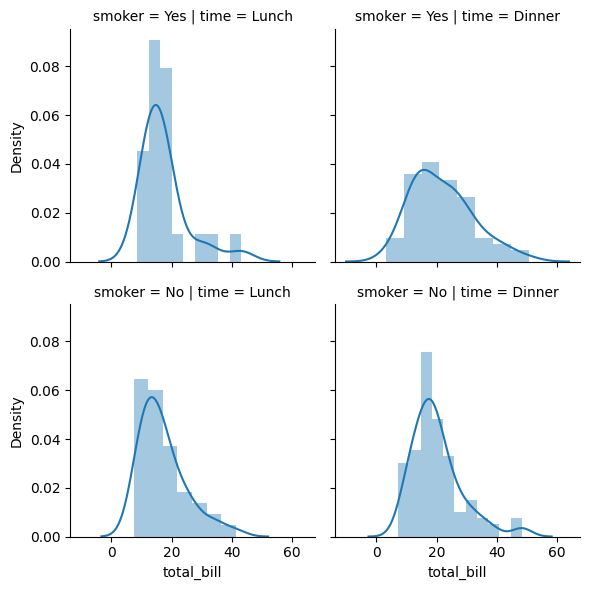

In [129]:
### FacetGrid 

g = sns.FacetGrid(data=tips,col='time', row='smoker')
g.map(sns.distplot,'total_bill')

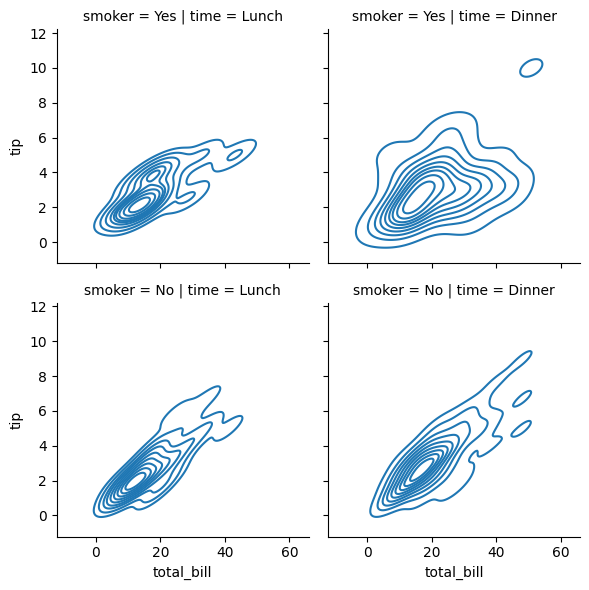

In [135]:
## Grid's 
g = sns.FacetGrid(data=tips,col='time', row='smoker')
g.map(sns.kdeplot,'total_bill','tip')

In [ ]:
#-------------------------------------REGRESSION PLOT'S-------------------------

In [64]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [66]:
%matplotlib inline
tips=sns.load_dataset('tips')

In [67]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


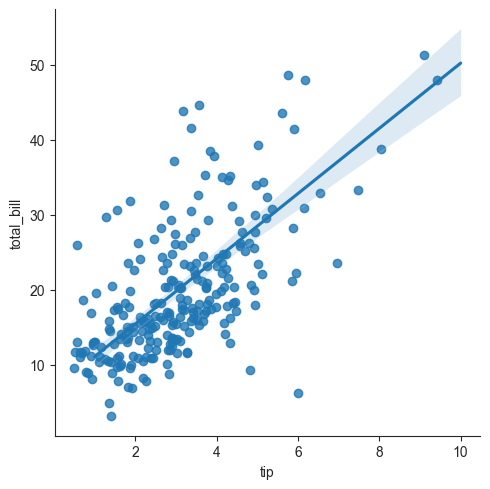

In [68]:
sns.lmplot(data=tips,x='tip',y='total_bill',x_jitter=True,y_jitter=True)

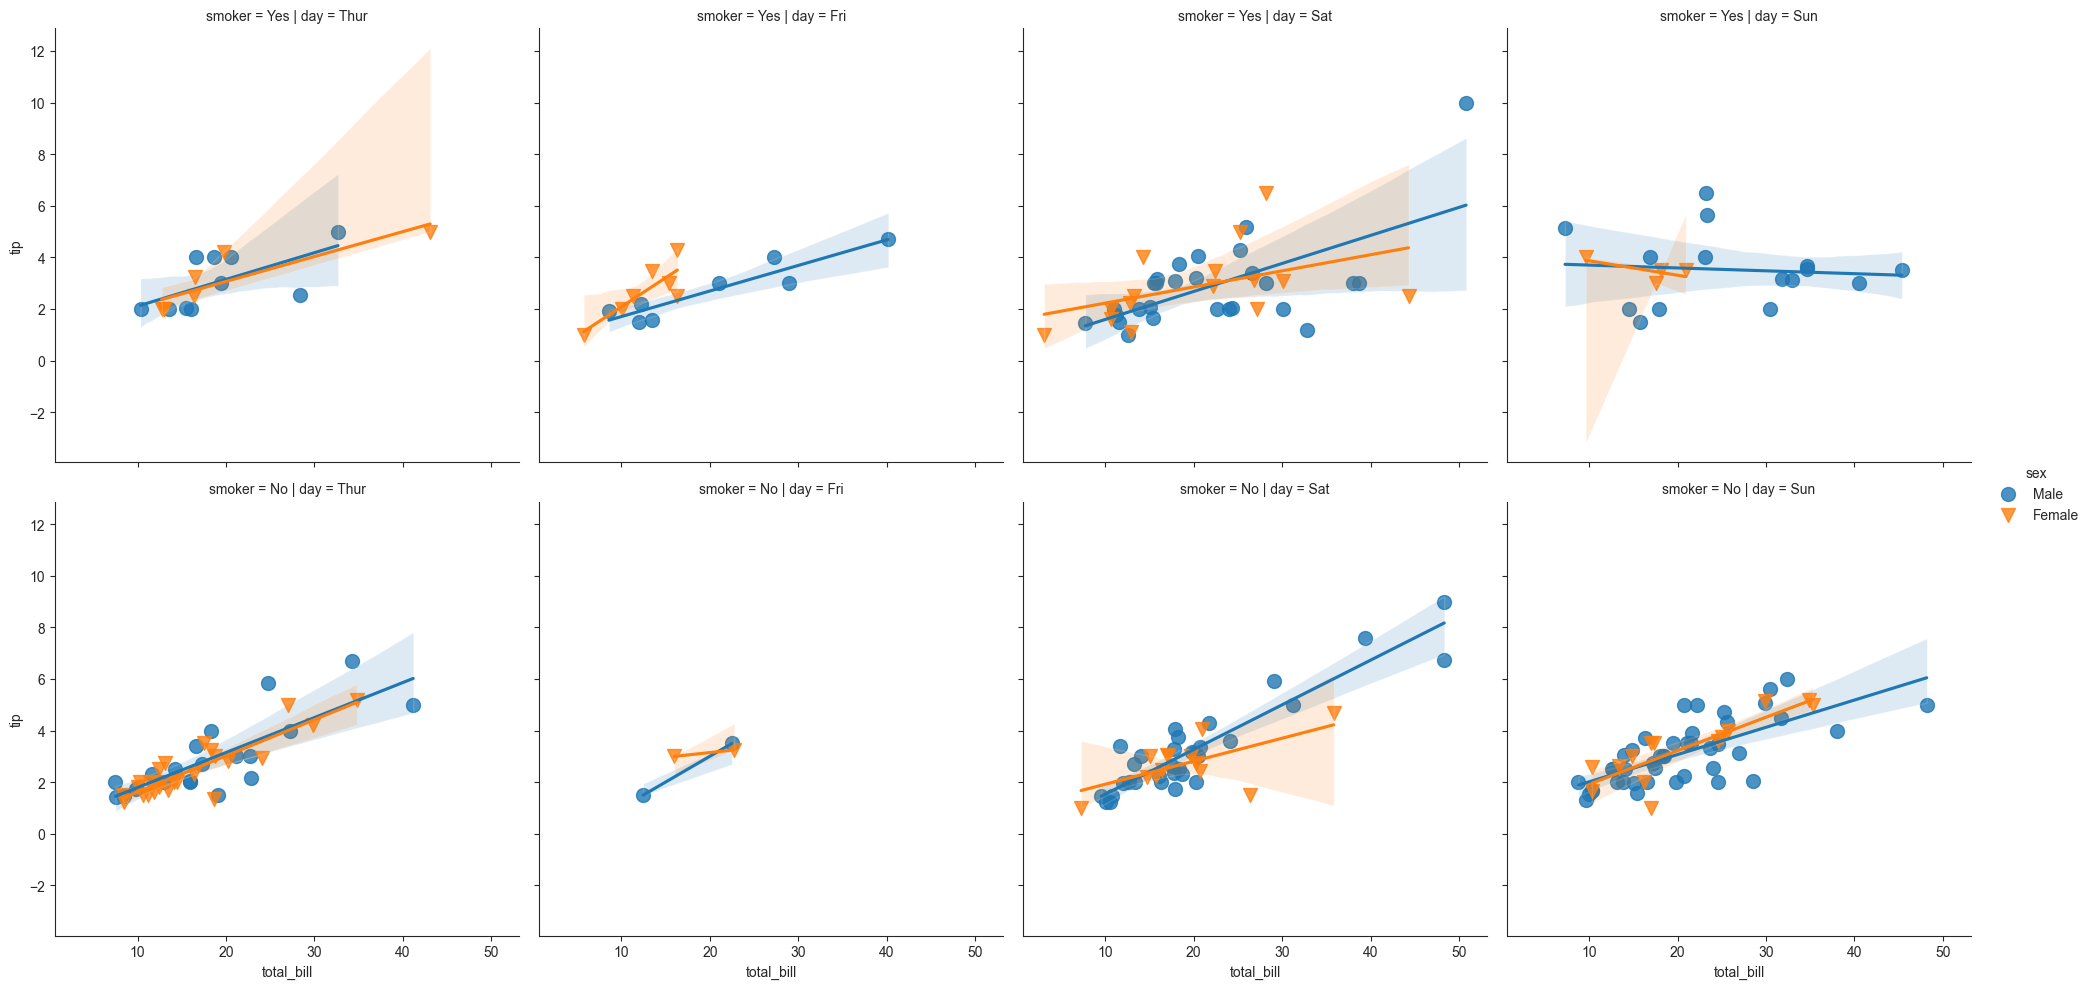

In [69]:
sns.lmplot(data=tips,x='total_bill',y='tip',aspect=1, markers=['o','v'],hue='sex',scatter_kws={'s':100},col='day',row='smoker')

<Axes: xlabel='sex', ylabel='count'>

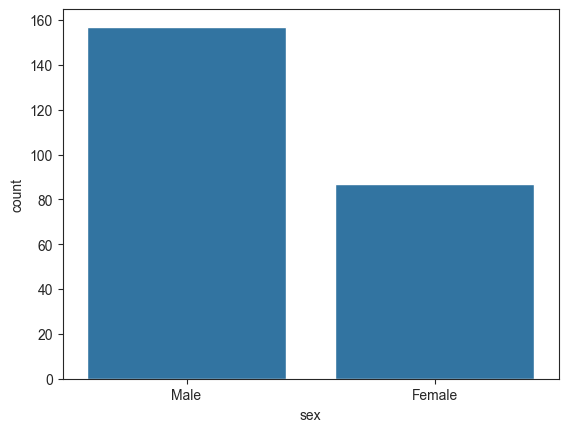

In [70]:
## Count Plot
sns.countplot(x='sex',data=tips)

C:\Users\AkhilPokuri\AppData\Local\Temp\ipykernel_708\2127934021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=tips,palette ='plasma')


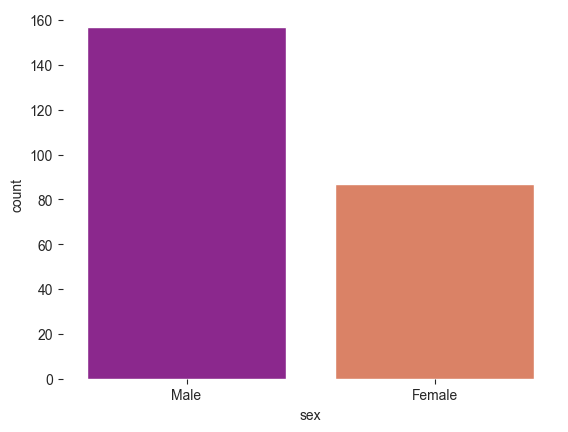

In [75]:
## styling the plot
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette ='plasma')
sns.despine(top=True, right=True, left=True, bottom=True)

In [76]:
#------------------------------PRATICE EXERCISE-----------------------------

In [175]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [80]:
data=sns.load_dataset('titanic')

In [82]:
data.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [83]:
data.shape

(891, 15)

In [90]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


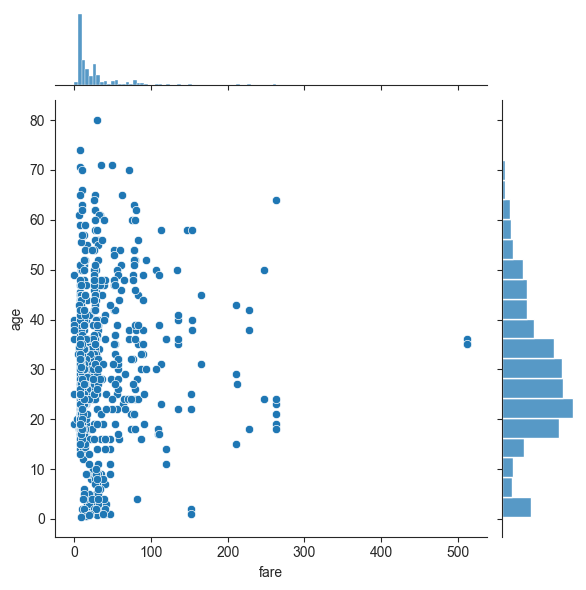

In [105]:
sns.jointplot(data=data,x='fare',y='age')

C:\Users\AkhilPokuri\AppData\Local\Temp\ipykernel_708\3853086669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fare'],kde=False,color='blue')


<Axes: xlabel='fare'>

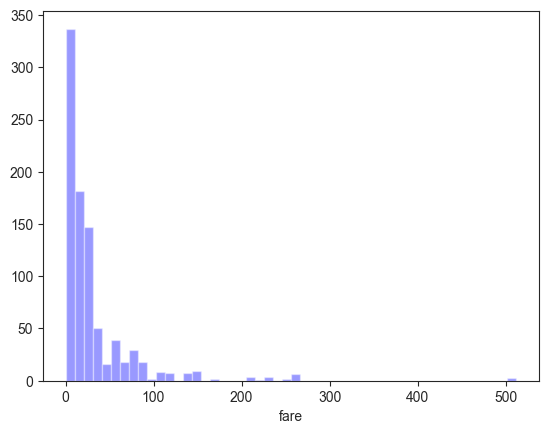

In [124]:
sns.distplot(data['fare'],kde=False,color='blue')

C:\Users\AkhilPokuri\AppData\Local\Temp\ipykernel_708\1045368368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fare'],kde=False,color='red',bins=30)


<Axes: xlabel='fare'>

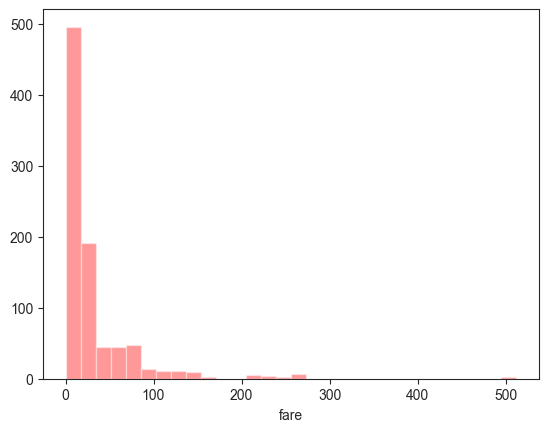

In [127]:
sns.distplot(data['fare'],kde=False,color='red',bins=30)

<Axes: xlabel='class', ylabel='age'>

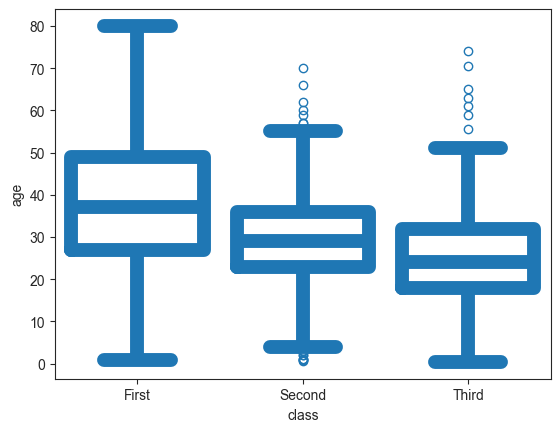

In [135]:
sns.boxplot(data=data,x='class',y='age', saturation=10,fill=False,width=0.8,linecolor='Black', linewidth=10)

C:\Users\AkhilPokuri\AppData\Local\Temp\ipykernel_708\1410655797.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data,x='class',y='age',palette='Set2')


<Axes: xlabel='class', ylabel='age'>

C:\Users\AkhilPokuri\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


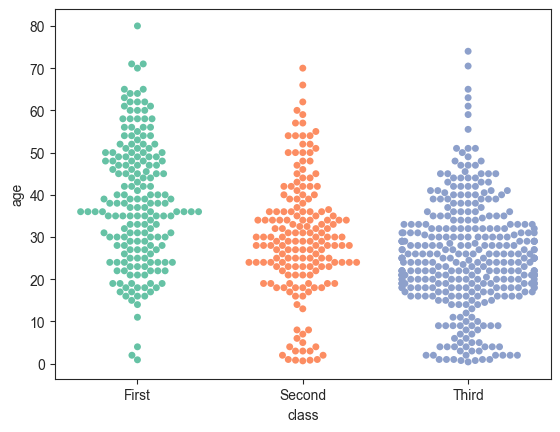

In [143]:
sns.swarmplot(data=data,x='class',y='age',palette='Set2')
#sns.swarmplot(data=data,x='class',y='age',palette='rainbow')

<Axes: xlabel='sex', ylabel='count'>

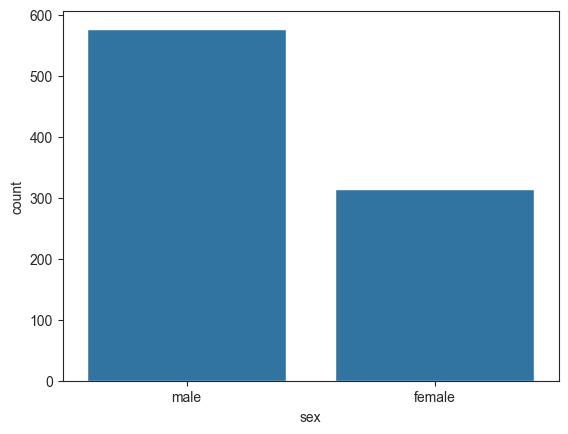

In [148]:
sns.countplot(data=data,x='sex')

In [151]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [156]:
## eleminationg string values from data file, for to deal with matrix ploting -- heat map
## we need to check the co-relation ship in data
## and saving the converted data values in the variable called df.
df=data.select_dtypes(include=[np.number])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [157]:
## checking the co-relation ship in data
df.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

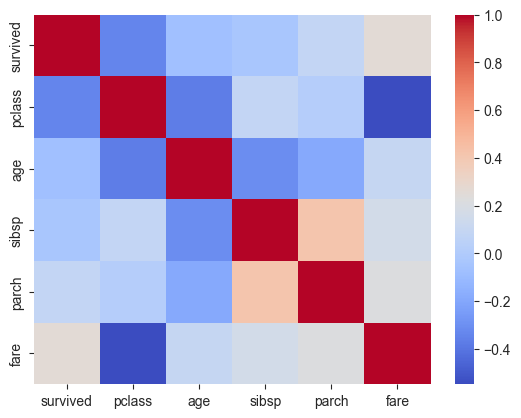

In [162]:
# type-1
sns.heatmap(df.corr(),cmap='coolwarm')

<Axes: >

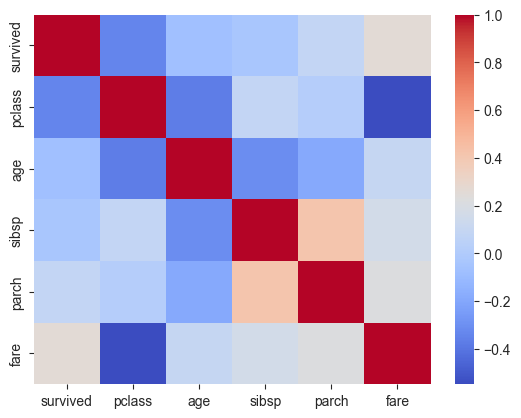

In [187]:
dc=df.corr()
dc
sns.heatmap(data=dc,cmap='coolwarm')
#plt.title('titanic.corr()')

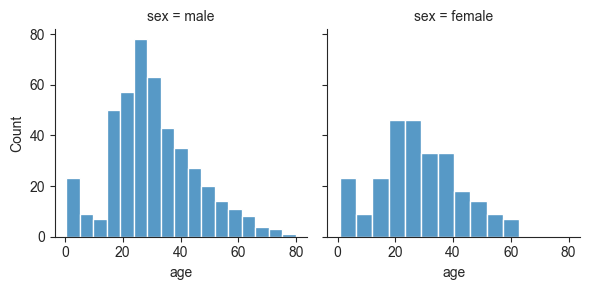

In [202]:
g=sns.FacetGrid(data=data,col='sex')
g.map(sns.histplot,'age')

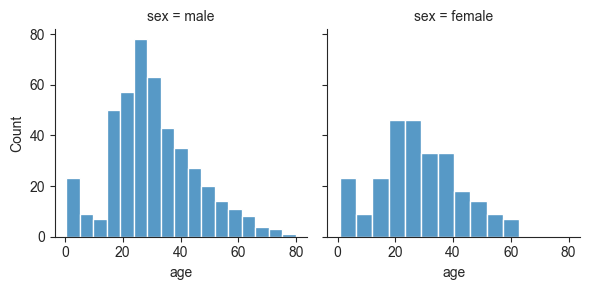

In [204]:
FG=sns.FacetGrid(data=data,col='sex')
FG.map(sns.histplot,'age')